<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Brain_MRI_Images_for_Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
# The command pip install kaggle
# is used to install the Kaggle Python package using the pip package manager

In [ ]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kehindeoluwaseun","key":"34b8688e556df9e46dd1bf0ae96b6056"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# The set of code above are used to set up the Kaggle API key on my computer.
# The purpose of these commands is to create a directory named .kaggle
# in the home directory, move the Kaggle API key file (kaggle.json) into
# that directory, and set the appropriate permissions to ensure that only
# the owner has read and write access to the API key file.
# This is done for security reasons to protect your Kaggle API credentials
# from unauthorized access. The Kaggle API key is used to authenticate and
# interact with the Kaggle platform programmatically.

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 73% 11.0M/15.1M [00:00<00:00, 19.7MB/s]
100% 15.1M/15.1M [00:00<00:00, 16.3MB/s]


In [ ]:
!unzip brain-mri-images-for-brain-tumor-detection.zip -d brain-tumor-detection

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain-tumor-detection/brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain-tumor-detection/brain_tumor_dataset/no/10 no.jpg  
  inflating: brain-tumor-detection/brain_tumor_dataset/no/11 no.jpg  
  inflating: brain-tumor-detection/brain_tumor_dataset/no/12 no.jpg  
  inflating: brain-tumor-detection/brain_tumor_dataset/no/13 no.jpg  
  inflating: brain-tumor-detection/brain_tumor_dataset/no/14 no.jpg  
  inflating: brain-tumor-detection/brain_tumor_dataset/no/15 no.jpg  
  inflating: brain-tumor-detection/brain_tumor_dataset/no/17 no.jpg  
  inflating: brain-tumor-detection/brain_tumor_dataset/no/18 no.jpg  
  inflating: brain-tumor-detection/brain_tumor_dataset/no/19 no.jpg  
  inflating: brain-tumor-detection/brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain-tumor-detection/brain_tumor_dataset/no/20 no.jpg  
  inflating: brain-tumor-detection/brain_tumor_dataset/no/21 no.jpg  
  inflating: brain-tumor-detectio

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
# the code imports essential libraries for data analysis (pandas, numpy),
# file and directory manipulation (glob, os), and image processing (cv2).
# These libraries are commonly used in tasks related to data science,
# machine learning, and computer vision.
# Definition of the paths to the brain tumor image folders( no and yes)
no_folder = '/content/brain-tumor-detection/brain_tumor_dataset/no'
yes_folder = '/content/brain-tumor-detection/brain_tumor_dataset/yes'
# We are initializing the lists to store images and labels
images = []
labels = []
# We Load and pre-process no brain tumor images
for filename in os.listdir(no_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(no_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(0)  # 0 represents no brain tumor
# We Load and pre-process brain tumor images
for filename in os.listdir(yes_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(yes_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(1)  # 1 represents brain tumor

# We Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

# We are Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Assuming we have already loaded and pre-processed your data
# (x_train, y_train, x_test, y_test)

# Definition of the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes: No Brain Tumor and Brain Tumor
])

# Compilation of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training of the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
5/5 [==============================] - 11s 2s/step - loss: 512.8353 - accuracy: 0.5515 - val_loss: 61.3932 - val_accuracy: 0.5429
Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 40.7982 - accuracy: 0.6985 - val_loss: 61.2014 - val_accuracy: 0.5714
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 24.1086 - accuracy: 0.6985 - val_loss: 9.4887 - val_accuracy: 0.8571
Epoch 4/10
5/5 [==============================] - 4s 703ms/step - loss: 13.5323 - accuracy: 0.7206 - val_loss: 5.2901 - val_accuracy: 0.8286
Epoch 5/10
5/5 [==============================] - 3s 633ms/step - loss: 2.7731 - accuracy: 0.8456 - val_loss: 4.6099 - val_accuracy: 0.7714
Epoch 6/10
5/5 [==============================] - 4s 888ms/step - loss: 1.4275 - accuracy: 0.8603 - val_loss: 2.6208 - val_accuracy: 0.7714
Epoch 7/10
5/5 [==============================] - 3s 659ms/step - loss: 0.4789 - accuracy: 0.9118 - val_loss: 1.4835 - val_accuracy: 0.7429
Epoch 8/10
5/5 [=====

In [ ]:
# Evaluation of the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# We also make predictions on the test set
predictions = model.predict(x_test)

# We convert the one-hot encoded predictions to class labels
predicted_labels = tf.argmax(predictions, axis=1)

# Now we will compare the predicted labels with the true labels (y_test)
# to analyze performance further

2/2 [==============================] - 0s 24ms/step - loss: 0.8752 - accuracy: 0.8286
Test Loss: 0.8751579523086548
Test Accuracy: 0.8285714387893677
2/2 [==============================] - 0s 22ms/step


In [ ]:
# Predicting on a single image
sample_image = x_test[3]  # Here we replace with our image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)

# Here we interpret the label using our dataset's class labels (0 for no, 1 for yes)
class_labels = ['no', 'yes']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 26ms/step
Predicted class: yes


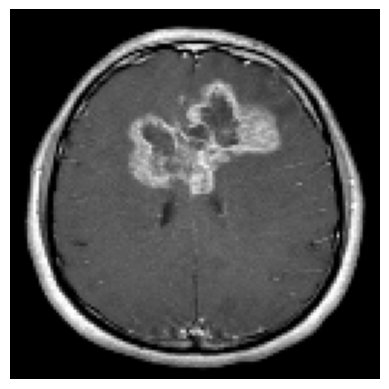

In [ ]:
import matplotlib.pyplot as plt

# Display the sample image
plt.imshow(sample_image)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [ ]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving Y100.JPG to Y100.JPG


{'Y100.JPG': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x10\xfeExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x01;\x00\x02\x00\x00\x00\x11\x00\x00\x08J\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x08\\\x9c\x9d\x00\x01\x00\x00\x00"\x00\x00\x10\xd4\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00>\x00\x00\x00\x00\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [ ]:
# we test the model with a new photo from the internet.
# we know already that this new image is a brain tumor image.
from PIL import Image
import numpy as np

# Load the new image
new_image_path = '/content/brain-tumor-detection/yes/Y1.jpg'
# Replace with the actual path to your new image
new_image = Image.open(new_image_path)

# Resize the image to match the input size expected by your model
input_size = (128, 128)  # Adjust this size based on your model's input size
new_image = new_image.resize(input_size)

# Convert the PIL image to a NumPy array
new_image_array = np.array(new_image)

# Normalize the image pixel values (if needed)
new_image_array = new_image_array / 255.0

# Making predictions on the new image
predictions = model.predict(np.expand_dims(new_image_array, axis=0))
predicted_label = np.argmax(predictions)

# Interpret the label using your dataset's class labels
class_labels = ['no', 'yes']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

# Close the image
new_image.close()


1/1 [==============================] - 0s 96ms/step
Predicted class: yes


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

2/2 [==============================] - 0s 28ms/step


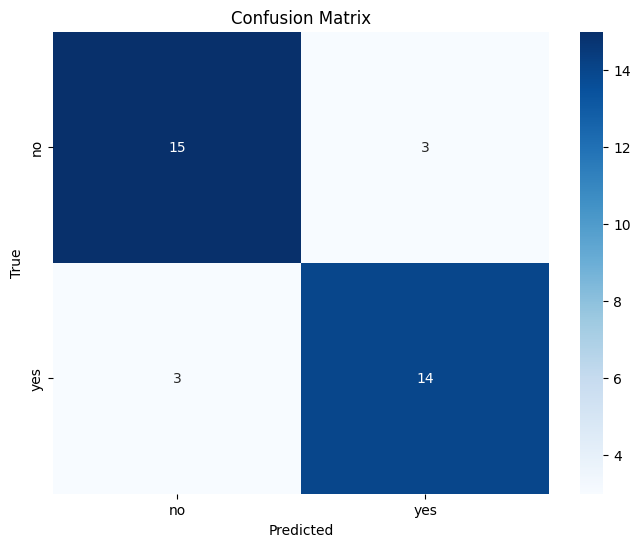

              precision    recall  f1-score   support

          no       0.83      0.83      0.83        18
         yes       0.82      0.82      0.82        17

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predicted_labels' are the model's predicted labels for the test set
# 'y_test' contains the true labels of the test set

# Convert one-hot encoded predictions to class labels
predicted_labels = model.predict(x_test)
predicted_labels = tf.argmax(predicted_labels, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
class_report = classification_report(y_test, predicted_labels, target_names=['no', 'yes'])
print(class_report)